# Customer Segmentation

## Introduction
This notebook attempts to create customer segments in order to better understand the type of customers that a company has, as well as build a dataset that can be used by machine learning models.

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

## Import Data

In [2]:
data = pd.read_csv('sales_data_sample.csv',encoding='cp1252')

## Data Exploration

In [3]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [4]:
print("Countries:",data['COUNTRY'].value_counts().count())
print("Products:",data['PRODUCTLINE'].value_counts().count())
print("Product Codes:",data['PRODUCTCODE'].value_counts().count())

Countries: 19
Products: 7
Product Codes: 109


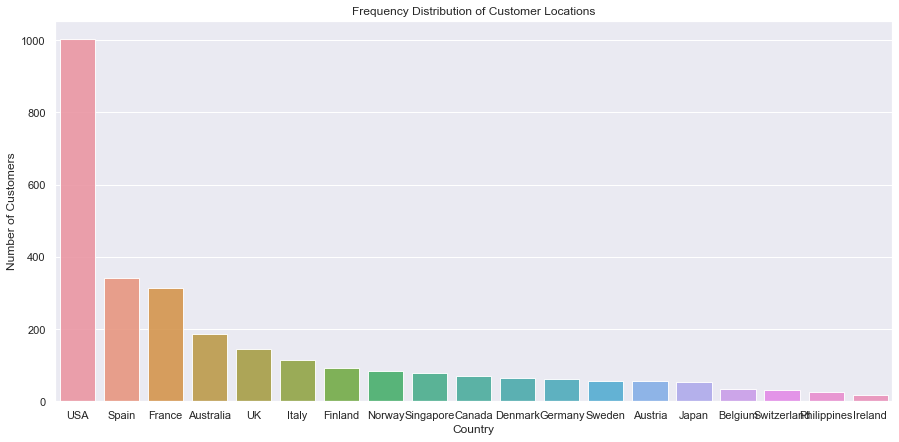

In [5]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data['COUNTRY'].value_counts().index, 
            data['COUNTRY'].value_counts().values, 
            alpha=0.9)
plt.title('Frequency Distribution of Customer Locations')
plt.ylabel('Number of Customers', 
           fontsize=12)
plt.xlabel('Country', 
           fontsize=12)

plt.show()

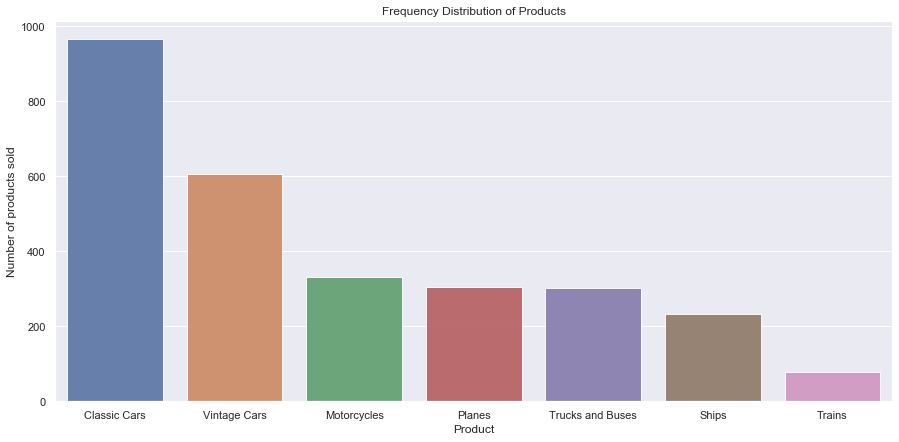

In [6]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data['PRODUCTLINE'].value_counts().index, 
            data['PRODUCTLINE'].value_counts().values, 
            alpha=0.9)
plt.title('Frequency Distribution of Products')
plt.ylabel('Number of products sold', 
           fontsize=12)
plt.xlabel('Product', 
           fontsize=12)

plt.show()

#### Changing column data types

In [7]:
data.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [8]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

#### Drop Columns

In [9]:
data = data.drop(['ORDERNUMBER','QUANTITYORDERED','PRICEEACH','ORDERLINENUMBER','STATUS','QTR_ID',
                  'MSRP','PHONE','ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE',
                  'TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME','MONTH_ID','YEAR_ID'],
                  axis=1)

## Data Manipulation

### Recency 

In [10]:
last_purchase =((data.sort_values(by=['ORDERDATE'], 
                                 ascending=True)).set_index('ORDERDATE')).groupby('CUSTOMERNAME').idxmax()
last_purchase.columns = ['last_purchase_date']
last_purchase['last_purchase(days)'] = ((last_purchase['last_purchase_date'].max() 
                                   - last_purchase['last_purchase_date']).dt.days)

In [11]:
last_purchase.head()

,last_purchase_date,last_purchase(days)
CUSTOMERNAME,,
"AV Stores, Co.",2004-11-17,195
Alpha Cognac,2003-07-04,697
Amica Models & Co.,2004-09-09,264
"Anna's Decorations, Ltd",2005-01-20,131
Atelier graphique,2003-05-20,742


### Frequency

In [12]:
tot_orders = data.groupby(['CUSTOMERNAME']).count().sort_values(by=['SALES'], 
                                                                ascending=False).drop(['PRODUCTLINE',
                                                                                       'PRODUCTCODE',
                                                                                       'COUNTRY',
                                                                                       'DEALSIZE',
                                                                                       'ORDERDATE'],
                                                                                        axis=1)
tot_orders.columns = ['tot_orders']

In [13]:
tot_orders.head()

,tot_orders
CUSTOMERNAME,
Euro Shopping Channel,259
Mini Gifts Distributors Ltd.,180
"Australian Collectors, Co.",55
La Rochelle Gifts,53
"AV Stores, Co.",51


### Revenue

In [14]:
tot_sales = data.groupby(['CUSTOMERNAME']).sum().sort_values(by=['SALES'],ascending=False)
tot_sales.columns = ['tot_sales']

In [15]:
tot_sales.head()

,tot_sales
CUSTOMERNAME,
Euro Shopping Channel,912294.11
Mini Gifts Distributors Ltd.,654858.06
"Australian Collectors, Co.",200995.41
Muscle Machine Inc,197736.94
La Rochelle Gifts,180124.90


### Create LTV table

In [16]:
ltv = (last_purchase.reset_index()[['CUSTOMERNAME',
                                    'last_purchase(days)']].merge(((tot_orders.reset_index()[['CUSTOMERNAME',
                                                                                        'tot_orders']])), 
                                                              how='inner', 
                                                              on='CUSTOMERNAME').merge(((tot_sales.reset_index()[['CUSTOMERNAME',
                                                                                                                  'tot_sales']])),
                                                                                         how='inner', 
                                                                                         on='CUSTOMERNAME')
      )

In [17]:
ltv.head()

,CUSTOMERNAME,last_purchase(days),tot_orders,tot_sales
0,"AV Stores, Co.",195,51,157807.81
1,Alpha Cognac,697,20,70488.44
2,Amica Models & Co.,264,26,94117.26
3,"Anna's Decorations, Ltd",131,46,153996.13
4,Atelier graphique,742,7,24179.96


#### Plotting LTV

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


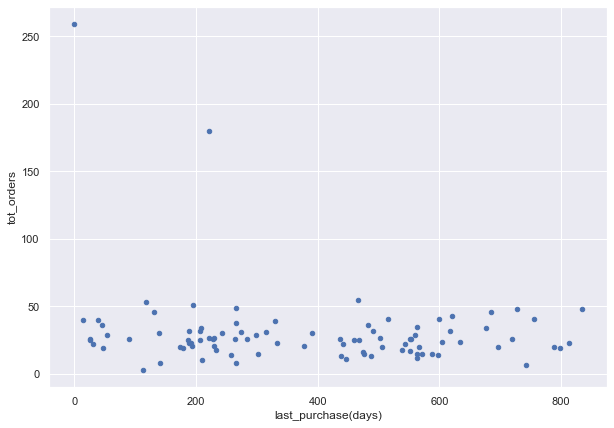

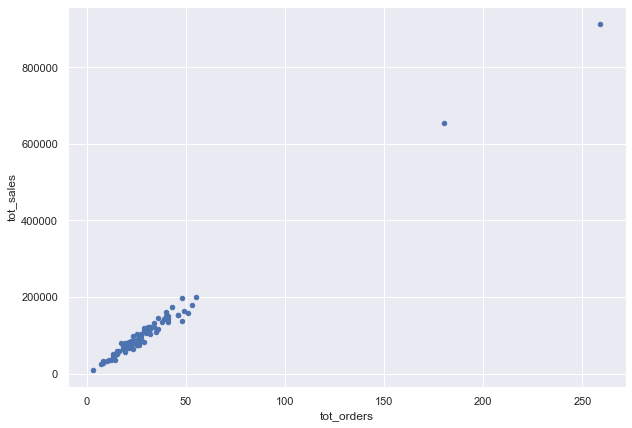

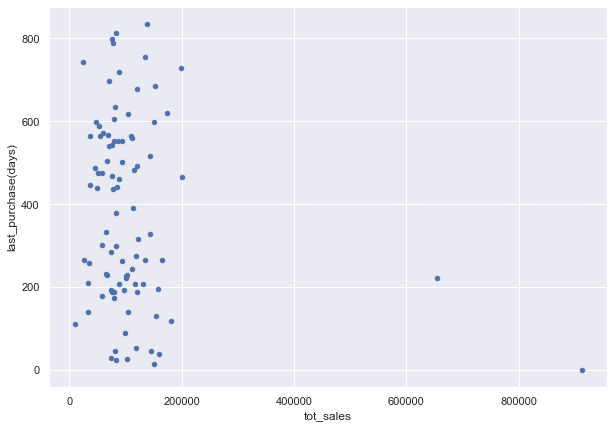

In [18]:
ltv.plot(kind="scatter", 
         x="last_purchase(days)", 
         y="tot_orders", 
         figsize=(10,7))
ltv.plot(kind="scatter", 
         x="tot_orders", 
         y="tot_sales",
         figsize=(10,7))
ltv.plot(kind="scatter", 
         x="tot_sales", 
         y="last_purchase(days)",
         figsize=(10,7))
plt.show()

There are two outliers in our dataset. Let's remove them to make modelling easier. 

In [19]:
ltv=ltv[ltv.CUSTOMERNAME !='Euro Shopping Channel']
ltv=ltv[ltv.CUSTOMERNAME !='Mini Gifts Distributors Ltd.']

### Product Purchasing Data

In [20]:
product_types = list(data['PRODUCTLINE'].value_counts().index)

In [21]:
product_sales = (pd.crosstab(data.CUSTOMERNAME, data.PRODUCTLINE))

In [22]:
product_sales_perc = product_sales.apply(lambda x : round(x/product_sales.sum(axis = 1, skipna = True),2)).reset_index()
product_sales_perc.columns = ['CUSTOMERNAME','classic_cars_%','motorcycles_%','planes_%',
                             'ships_%','trains_%','trucks_buses_%','vintage_cars_%'
                            ]
product_sales['tot_items'] = product_sales.sum(axis = 1, skipna = True)

In [23]:
product_sales = product_sales_perc.merge(product_sales.reset_index()[['CUSTOMERNAME',
                                                        'tot_items']],
                                         how='inner',
                                         on='CUSTOMERNAME'
                                        )

In [24]:
product_sales.head()

,CUSTOMERNAME,classic_cars_%,motorcycles_%,planes_%,ships_%,trains_%,trucks_buses_%,vintage_cars_%,tot_items
0,"AV Stores, Co.",0.37,0.00,0.0,0.14,0.06,0.00,0.43,51
1,Alpha Cognac,0.20,0.00,0.3,0.35,0.00,0.00,0.15,20
2,Amica Models & Co.,0.15,0.00,0.0,0.12,0.04,0.04,0.65,26
3,"Anna's Decorations, Ltd",0.52,0.13,0.0,0.00,0.00,0.20,0.15,46
4,Atelier graphique,0.57,0.29,0.0,0.00,0.00,0.00,0.14,7


#### Merge with LTV table

In [25]:
temp_table = product_sales.merge(ltv,
                        how='inner', 
                        on='CUSTOMERNAME')
             

In [26]:
temp_table.head()

,CUSTOMERNAME,classic_cars_%,motorcycles_%,planes_%,ships_%,trains_%,trucks_buses_%,vintage_cars_%,tot_items,last_purchase(days),tot_orders,tot_sales
0,"AV Stores, Co.",0.37,0.00,0.0,0.14,0.06,0.00,0.43,51,195,51,157807.81
1,Alpha Cognac,0.20,0.00,0.3,0.35,0.00,0.00,0.15,20,697,20,70488.44
2,Amica Models & Co.,0.15,0.00,0.0,0.12,0.04,0.04,0.65,26,264,26,94117.26
3,"Anna's Decorations, Ltd",0.52,0.13,0.0,0.00,0.00,0.20,0.15,46,131,46,153996.13
4,Atelier graphique,0.57,0.29,0.0,0.00,0.00,0.00,0.14,7,742,7,24179.96


### Add Country Data

### Label Customers

In [27]:
temp_table.describe()

,classic_cars_%,motorcycles_%,planes_%,ships_%,trains_%,trucks_buses_%,vintage_cars_%,tot_items,last_purchase(days),tot_orders,tot_sales
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.326111,0.125444,0.116667,0.089444,0.024111,0.096000,0.221444,26.488889,385.088889,26.488889,94060.852000
std,0.217450,0.171995,0.153293,0.126130,0.036192,0.126489,0.173895,11.154930,222.164057,11.154930,40218.343211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,14.000000,3.000000,9129.350000
25%,0.162500,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,19.250000,207.000000,19.250000,69411.417500
50%,0.280000,0.040000,0.025000,0.030000,0.000000,0.035000,0.180000,25.500000,384.500000,25.500000,85363.790000
75%,0.480000,0.247500,0.212500,0.140000,0.050000,0.165000,0.300000,32.000000,563.000000,32.000000,117934.592500
max,1.000000,0.900000,0.630000,0.540000,0.120000,0.500000,0.740000,55.000000,834.000000,55.000000,200995.410000


#### Apply K-means clustering to find optimum number of categories

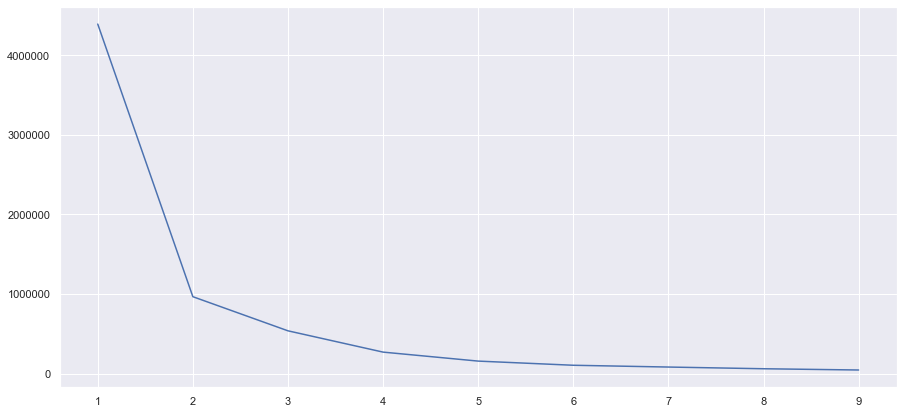

In [28]:
sse={}
temp = temp_table[['last_purchase(days)']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(temp)
    temp['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.show()

Here, three looks like the best. Below it is applied to the k-means clustering model. 

In [29]:
kmeans = KMeans(n_clusters=3)

Function for ordering cluster numbers. 2 will be assigned to those with the highest recency. 

In [30]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

Function to apply kmeans to the appropriate columns and return a table.

In [31]:
def apply_kmeans(lst):
    global temp_table
    for i in lst:
        kmeans.fit(temp_table[[str(i)]])
        temp_table[str(i) +'_cluster'] = kmeans.predict(temp_table[[str(i)]])
        temp_table = order_cluster(str(i) +'_cluster', str(i),temp_table,False)
        display(temp_table.groupby(str(i) +'_cluster')[str(i)].describe())

#### Apply kmeans function to the appropriate columns.

In [32]:
apply_kmeans(['last_purchase(days)','tot_orders','tot_sales'])

,count,mean,std,min,25%,50%,75%,max
last_purchase(days)_cluster,,,,,,,,
0,11.0,748.818182,53.620552,677.0,708.0,742.0,793.5,834.0
1,35.0,521.428571,66.819461,378.0,471.0,539.0,565.5,634.0
2,44.0,185.704545,91.134600,14.0,127.5,201.0,259.5,333.0


,count,mean,std,min,25%,50%,75%,max
tot_orders_cluster,,,,,,,,
0,18.0,43.944444,5.764723,36.0,40.00,42.0,48.0,55.0
1,44.0,26.795455,3.812949,21.0,24.00,26.0,30.0,35.0
2,28.0,14.785714,4.557104,3.0,12.75,15.0,19.0,20.0


,count,mean,std,min,25%,50%,75%,max
tot_sales_cluster,,,,,,,,
0,18.0,156024.620000,20467.677510,131685.30,142669.56,150726.74,163054.6475,200995.41
1,49.0,93003.959184,16345.885200,70488.44,78570.34,88041.26,104561.9600,122138.14
2,23.0,47819.109565,16047.268838,9129.35,35506.48,50218.51,58612.7750,69052.41


We need to do some slight adjustments, because we need the clusters labeled "2" for tot_orders and tot_sales to be the customers with the highest numbero of orders and/or sales. This is because we want customers with those attributes to score highly.

In [33]:
temp_table['tot_orders_cluster'] = temp_table['tot_orders_cluster'].replace({0:2, 2:0})
temp_table['tot_sales_cluster'] = temp_table['tot_sales_cluster'].replace({0:2, 2:0})
display(temp_table.groupby('tot_sales_cluster')['tot_sales'].describe())
display(temp_table.groupby('tot_orders_cluster')['tot_orders'].describe())

,count,mean,std,min,25%,50%,75%,max
tot_sales_cluster,,,,,,,,
0,23.0,47819.109565,16047.268838,9129.35,35506.48,50218.51,58612.7750,69052.41
1,49.0,93003.959184,16345.885200,70488.44,78570.34,88041.26,104561.9600,122138.14
2,18.0,156024.620000,20467.677510,131685.30,142669.56,150726.74,163054.6475,200995.41


,count,mean,std,min,25%,50%,75%,max
tot_orders_cluster,,,,,,,,
0,28.0,14.785714,4.557104,3.0,12.75,15.0,19.0,20.0
1,44.0,26.795455,3.812949,21.0,24.00,26.0,30.0,35.0
2,18.0,43.944444,5.764723,36.0,40.00,42.0,48.0,55.0


#### Create LTV label

In [34]:
temp_table.columns

Index(['CUSTOMERNAME', 'classic_cars_%', 'motorcycles_%', 'planes_%',
       'ships_%', 'trains_%', 'trucks_buses_%', 'vintage_cars_%', 'tot_items',
       'last_purchase(days)', 'tot_orders', 'tot_sales',
       'last_purchase(days)_cluster', 'tot_orders_cluster',
       'tot_sales_cluster'],
      dtype='object')

Create overall score.

In [35]:
temp_table['ltv'] = temp_table[
    'last_purchase(days)_cluster'] + temp_table[
    'tot_orders_cluster'] + temp_table[
    'tot_sales_cluster']

In [36]:
temp_table['ltv'].value_counts().sort_index()

0     1
1    15
2    13
3    20
4    27
5     5
6     9
Name: ltv, dtype: int64

In [37]:
temp_table['priority'] = 'low'
temp_table.loc[temp_table['ltv']>1,'priority'] = 'med' 
temp_table.loc[temp_table['ltv']>4,'priority'] = 'high' 

In [38]:
temp_table['priority'].value_counts()

med     60
low     16
high    14
Name: priority, dtype: int64

We use these labels to color our previous plots.

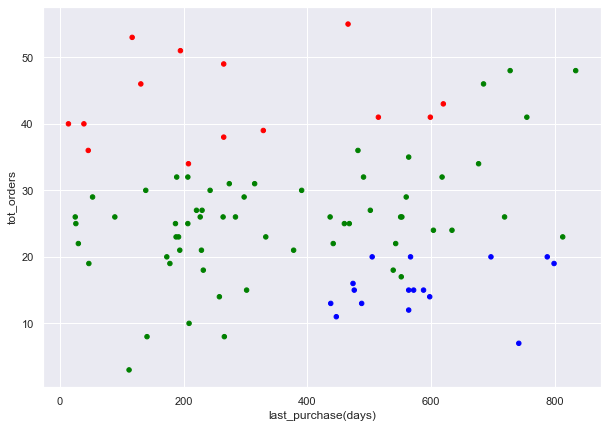

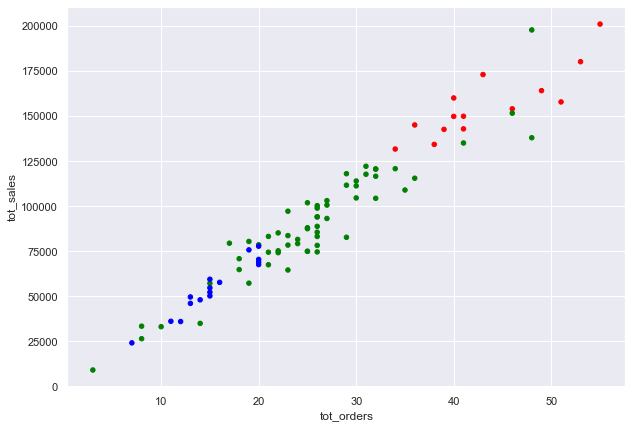

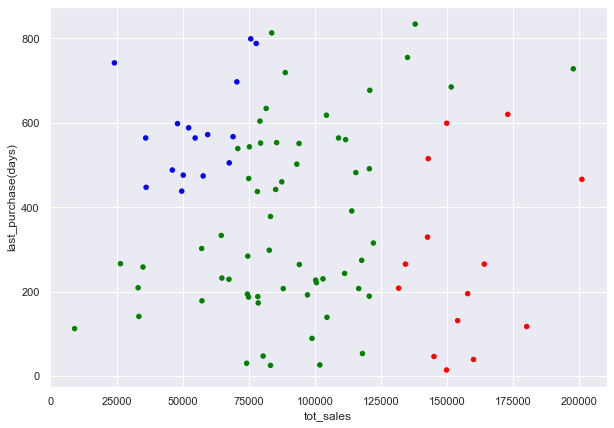

In [42]:
colors = {'high':'red', 'med':'green', 'low':'blue'}
temp_table.plot(kind="scatter", x="last_purchase(days)", y="tot_orders",
    figsize=(10,7),
    c=temp_table['priority'].apply(lambda x: colors[x]),
    )
temp_table.plot(kind="scatter", x="tot_orders", y="tot_sales", 
    figsize=(10,7),
    c=temp_table['priority'].apply(lambda x: colors[x]),
    )
temp_table.plot(kind="scatter", x="tot_sales", y="last_purchase(days)",
    figsize=(10,7),
    c=temp_table['priority'].apply(lambda x: colors[x]),
    )
plt.show()

### Export Data

In [40]:
final_data = temp_table.to_csv('final_data.csv')